<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Удаление-лишних-символов-из-текста" data-toc-modified-id="Удаление-лишних-символов-из-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Удаление лишних символов из текста</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Облато-слов" data-toc-modified-id="Облато-слов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Облато слов</a></span></li><li><span><a href="#Разделим-данные-на-train-и-test" data-toc-modified-id="Разделим-данные-на-train-и-test-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделим данные на train и test</a></span></li><li><span><a href="#Преобразуем-текст-используя-метод-TF-IDF" data-toc-modified-id="Преобразуем-текст-используя-метод-TF-IDF-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Преобразуем текст используя метод TF-IDF</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Итог:" data-toc-modified-id="Итог:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Итог:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Анализ-результатов-обучения" data-toc-modified-id="Анализ-результатов-обучения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ результатов обучения</a></span></li><li><span><a href="#Итоги-обучения" data-toc-modified-id="Итоги-обучения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Итоги обучения</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

**Введение**

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Цель:<br>
Построить модель способную классифицировать коментарии с метрикой качества F1 > 0.75**

*Выбранная метрика F1 подходит для двоичных целей.*

**План работ**

1. Загрузить и подготовьте данные.
2. Обучить разные модели. 
3. Итоги.

## Подготовка

### Импорты

In [1]:
import time
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import nltk
from tqdm import tqdm

from imblearn.over_sampling import SMOTE
from pandarallel import pandarallel
from PIL import Image
from wordcloud import WordCloud

nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
nltk.download('averaged_perceptron_tagger') # усредненный тригер

RND = 12345

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TG2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TG2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TG2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TG2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
try:
    df = pd.read_csv('toxic_comments.csv', index_col=0)
except: 
    df = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

**Посмотрим на данные**

In [3]:
df.sample(10)

,text,toxic
59565,"Thank you very much, Korruski.",0
55754,"""\n ==Hans Schuler==\n\nSchuler's a piece of w...",0
55546,"""\n\n BracketBot - Garri.Lewl Thank you for yo...",0
142222,Thanks for your edit at Raphanus raphanistrum!...,0
140524,I'm not happy; Ah hah! meaning I've just disco...,0
85298,"Look dude, I donated on thousand dollars to Wi...",0
57730,The Winston Hotel Southampton \n\nHi - rather ...,0
112686,"Thank you very much. Yes, I definitely agree ...",0
30526,My source was fucking TELEVISED.,1
91474,December 2011 \n\nIf you vandalize Wikipedia a...,0


Есть, много лишних символов, вроде слешей,кавычек и т.п.

**Обнаружен дикий дисбаланс классов**

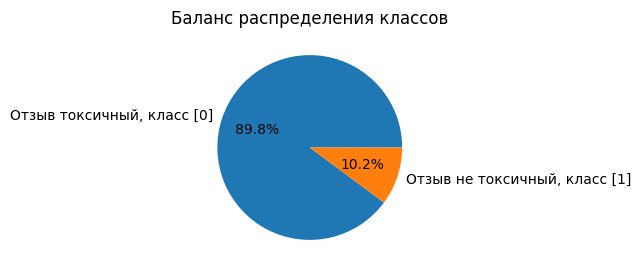

In [4]:
df['toxic'].value_counts(normalize=True).plot(kind='pie',
                                                   figsize=[4,3], 
                                                   legend=False, 
                                                   autopct='%1.1f%%',
                                                   labels=['Отзыв токсичный, класс [0]','Отзыв не токсичный, класс [1]'])
plt.title('Баланс распределения классов')
plt.ylabel('')
plt.show()

### Удаление лишних символов из текста

In [5]:
def clear_text(text):
    clear_text = re.sub(r'[^a-zA-Z ]', ' ', text).split()
    clear_text = ' '.join(clear_text)
    return(clear_text)
df['text'] = df['text'].apply(clear_text)

In [6]:
df.sample(5)

,text,toxic
146079,Noether s Theorem Okay Is there a simple way t...,0
11335,they weren t I ll revert them as well as time ...,0
156939,Thanks for the compliment,0
51068,Alphabetisation Just being a little pedantic b...,0
63256,The reason it all happens in your talk page is...,0


### Лемматизация

Будем использовать лематизацию с POS-тегами

In [7]:
text = list(df['text'])
lemmatizer = nltk.WordNetLemmatizer()

**Осторожно. Достаточно долго выполняется**

In [8]:
tqdm.pandas()
pandarallel.initialize(progress_bar = True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [9]:
%%time
def lem_func(text):
    import nltk
    from nltk.corpus import wordnet 
    from nltk.stem import WordNetLemmatizer 
 
    lemmatizer = WordNetLemmatizer()
    
    k=[]
    for w in nltk.word_tokenize(text, language = "english"):
        tag = nltk.pos_tag([w])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        tag_dict.get(tag, wordnet.NOUN) 
        k.append(lemmatizer.lemmatize(w, tag_dict.get(tag, wordnet.NOUN)))        
    return ' '.join(k) 
 
df['text'] = df['text'].parallel_apply(lem_func)

CPU times: total: 28.7 s
Wall time: 20min


In [10]:
df.sample(10)

,text,toxic
144905,Budget Proposal Leaves Law School Out In The C...,0
86627,Loves everyone in the world,0
44739,But absent any settle outcome those who want t...,0
115702,Policy And nor should you revert The Wiki way ...,0
152110,Civil law related stuff Hello Economy I be won...,0
134091,What be racist about the comment I put There b...,1
102526,Oh give me a break If you d be watch me argue ...,1
134829,Regarding edits make during July UTC to Johann...,0
74820,Edit request on April The article state that o...,0
87764,Hi there MCMATTY VASCO from Portugal here a yo...,0


In [11]:
df['text'] = df['text'].str.lower()

In [12]:
df.sample(5)

,text,toxic
78608,incidentally it be worth get yourself a userna...,0
54249,cream be confirm like a week ago i m prety sur...,0
58239,please refrain from post innaccurate infomatio...,0
118083,hello to jeffro above the original and first r...,0
98036,speak for yourself tough guy my only interest ...,0


In [15]:
stop_words = stopwords.words('english')

In [16]:
text_raw = " ".join(df['text'])

### Облато слов

In [19]:
%%time
cloud = WordCloud(stopwords=stop_words, random_state=RND).generate(text_raw)

CPU times: total: 19.8 s
Wall time: 19.8 s


(-0.5, 399.5, 199.5, -0.5)

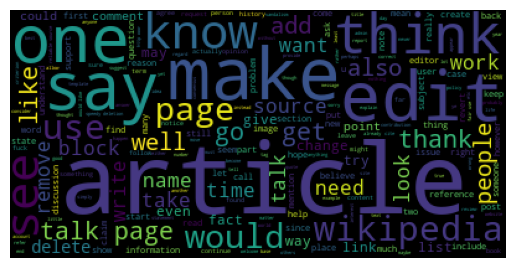

In [20]:
plt.imshow(cloud)
plt.axis('off')

###  Разделим данные на train и test

<AxesSubplot:title={'center':'Разделение датафрейма stratify'}, ylabel='data'>

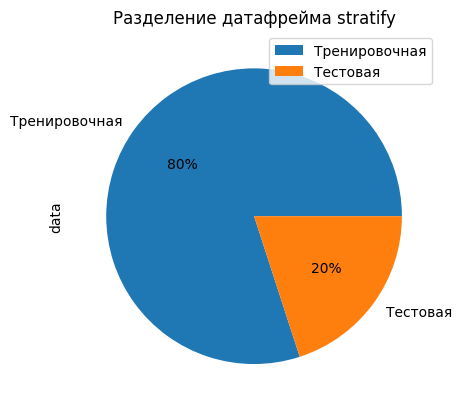

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('toxic', axis=1), df.toxic, test_size=0.2, random_state=RND, stratify=df['toxic']) 
# стратификация для равномерного распределения классов
data_separation = pd.DataFrame({'name': ['Тренировочная',
                                         'Тестовая'],
                                'data': [
                                    X_train.shape[0],
                                    X_test.shape[0]]})
data_separation = data_separation.set_index('name')
data_separation.plot(kind='pie', y='data', autopct='%1.0f%%', title='Разделение датафрейма stratify')

### Преобразуем текст используя метод TF-IDF

In [25]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_X_train = tfidf.fit_transform( X_train['text'])
tfidf_X_test = tfidf.transform(X_test['text'])

### Баланс классов

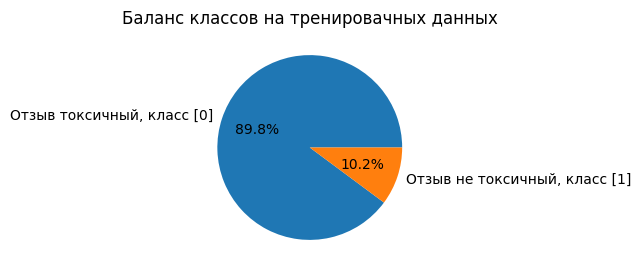

In [26]:
y_train.value_counts(normalize=True).plot(kind='pie',
                                                   figsize=[4,3], 
                                                   legend=False, 
                                                   autopct='%1.1f%%',
                                                   labels=['Отзыв токсичный, класс [0]','Отзыв не токсичный, класс [1]'])
plt.title('Баланс классов на тренировачных данных')
plt.ylabel('')
plt.show()

**Востанавливаем баланс классов при помощи SMOTE**

In [27]:
%%time
sm = SMOTE(random_state=RND, k_neighbors=5)
sm_X_train, sm_y_train = SMOTE().fit_resample(tfidf_X_train, y_train)

CPU times: total: 2.98 s
Wall time: 2.99 s


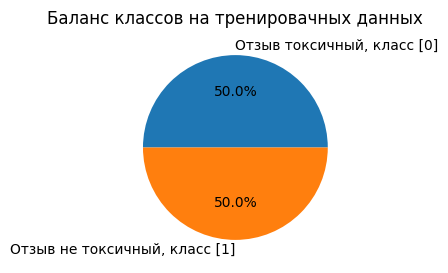

In [28]:
sm_y_train.value_counts(normalize=True).plot(kind='pie',
                                                   figsize=[4,3], 
                                                   legend=False, 
                                                   autopct='%1.1f%%',
                                                   labels=['Отзыв токсичный, класс [0]','Отзыв не токсичный, класс [1]'])
plt.title('Баланс классов на тренировачных данных')
plt.ylabel('')
plt.show()

### Итог:

Была проведена начальная подготовка данных, которая включала в себя:
* удаление лишних символов
* лемматизацию с помощью `WordNetLemmatizer()` с учетом POS-тегов
* данные разделены на тренировочную и тестовую части с использованием стратификации для равномерного распределения классов
* преобразование данных метод TF-IDF

Восстановлен, выявленный на начальном этапе дизбаланс классов с использованием SMOTE. <br>
Далее, решение будет идти двумя паралельными путями. По идее равномерного распределения класов с помощью стратификации должно хватить для корректного обучения моделей.

Но, баланс классов востановлен при помощи SMOTE. Дальнейшее обучение моделей будет проходить на данных после стратификации и SMOTE. Таким образом, можно будет выяснить достаточно ли статификации или все же целесообразнее использовать SMOTE.

## Обучение

***Вот тут решение раздвояицо и дальше пойдет паралельными путями***

### LogisticRegression

In [29]:
# тут для итоговой таблицы
name_model = []
time_model = []
F1_model = []

In [30]:
%%time
name_model.append('LogisticRegression')
start = time.time()

lr = LogisticRegression(random_state=RND)
lr_params = {'penalty': ['l2'],
          'class_weight': ['balanced'],
          'C': [5, 20]}
lr_random = RandomizedSearchCV(lr, lr_params, scoring='f1', 
                               n_iter=500, random_state=RND, 
                               n_jobs=-1, cv=3)
lr_random = lr_random.fit(tfidf_X_train, y_train)

time_model.append(time.time() - start)
f1 = lr_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Лучшие параметры:', lr_random.best_params_)
print('*'*30)

F1: 0.7587988258996771
Лучшие параметры: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 5}
******************************
CPU times: total: 3.11 s
Wall time: 13.3 s


параметры больше бесполезно крутить, результат лучше не становится

**LogisticRegression SMOTE**

In [31]:
%%time
name_model.append('LogisticRegression SMOTE')
start = time.time()

sm_lr_random = RandomizedSearchCV(lr, lr_params, scoring='f1', 
                               n_iter=500, 
                               random_state=RND, 
                               n_jobs=-1, cv=3)
sm_lr_random = sm_lr_random.fit(sm_X_train, sm_y_train)

time_model.append(time.time() - start)
f1 = sm_lr_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Параметры:', lr_random.best_params_)
print('*'*30)

F1: 0.9527818137107018
Параметры: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 5}
******************************
CPU times: total: 4.09 s
Wall time: 14.3 s


### CatBoostClassifier

In [32]:
%%time
name_model.append('CatBoostClassifier')
start = time.time()

cat_model = CatBoostClassifier(iterations=100, 
                          verbose=False,
                          random_seed=RND)
cat_params = {'depth': range(2, 10, 2)}
cat_random = RandomizedSearchCV(cat_model, cat_params,
                               scoring='f1', 
                               random_state=RND, 
                               n_jobs=-1, cv=3)
cat_random.fit(tfidf_X_train, y_train) 

time_model.append(time.time() - start)
f1 = cat_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Лучшие параметры:', cat_random.best_params_)
print('*'*30)

F1: 0.729410538870992
Лучшие параметры: {'depth': 6}
******************************
CPU times: total: 8min 26s
Wall time: 6min 21s


**CatBoostClassifier SMOTE**

In [33]:
%%time
name_model.append('CatBoostClassifier SMOTE')
start = time.time()

cat_random = RandomizedSearchCV(cat_model, cat_params,
                               scoring='f1', 
                               random_state=RND, 
                               n_jobs=-1, cv=3)
cat_random.fit(sm_X_train, sm_y_train) 

time_model.append(time.time() - start)
f1 = cat_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Лучшие параметры:', cat_random.best_params_)
print('*'*30)
print('f1', cat_random.best_score_)
print('*'*30)

F1: 0.9117998025641381
Лучшие параметры: {'depth': 6}
******************************
f1 0.9117998025641381
******************************
CPU times: total: 12min 19s
Wall time: 9min 19s


### LGBMClassifier

In [34]:
%%time
name_model.append('LGBMClassifier')
start = time.time()

lgbm_model = LGBMClassifier(random_state=RND, boosting_type='gbdt')
lgbm_params = {'n_estimators': np.arange(50, 300, 50),
          'num_leaves': [31, 51],
          'max_depth': np.arange(1, 41, 10)
}
lgbm_random = RandomizedSearchCV(lgbm_model, lgbm_params,
                               scoring='f1', 
                               random_state=RND, 
                               n_jobs=-1, cv=3)
lgbm_random.fit(tfidf_X_train, y_train)

time_model.append(time.time() - start)
f1 = lgbm_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Лучшие параметры:', lgbm_random.best_params_)
print('*'*30)

F1: 0.7549666328274136
Лучшие параметры: {'num_leaves': 31, 'n_estimators': 250, 'max_depth': 21}
******************************
CPU times: total: 3min 21s
Wall time: 3min 13s


**LGBMClassifier SMOTE**

In [35]:
%%time
name_model.append('LGBMClassifier SMOTE')
start = time.time()

lgbm_random = RandomizedSearchCV(lgbm_model, lgbm_params,
                               scoring='f1', 
                               random_state=RND, 
                               n_jobs=-1, cv=3)
lgbm_random.fit(sm_X_train, sm_y_train)

time_model.append(time.time() - start)
f1 = lgbm_random.best_score_
F1_model.append(f1)
print('F1:', f1)
print('Лучшие параметры:', lgbm_random.best_params_)
print('*'*30)

F1: 0.9336048780207035
Лучшие параметры: {'num_leaves': 31, 'n_estimators': 250, 'max_depth': 21}
******************************
CPU times: total: 6min 33s
Wall time: 6min 14s


###  Анализ результатов обучения

In [36]:
results = {
    'Model' : pd.Series(name_model),
    'Time': pd.Series(time_model),
    'F1' :pd.Series(F1_model),
    }
results = pd.DataFrame(results)
results = results.set_index('Model')
results = results.sort_values('F1')
display(results)

,Time,F1
Model,,
CatBoostClassifier,381.238698,0.729411
LGBMClassifier,193.639297,0.754967
LogisticRegression,13.326022,0.758799
CatBoostClassifier SMOTE,559.633689,0.911800
LGBMClassifier SMOTE,374.245049,0.933605
LogisticRegression SMOTE,14.280040,0.952782


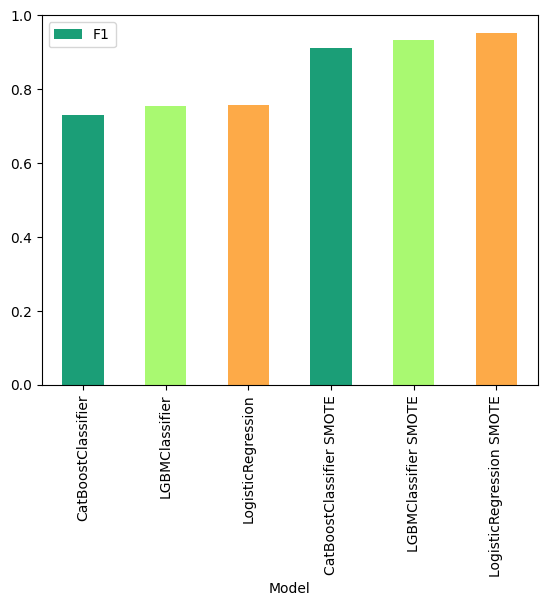

In [37]:
results['F1'].plot(kind='bar', legend=True, color = ['#1b9e77', '#a9f971', '#fdaa48']);

### Итоги обучения

По итогам,можно отметить, что лучшей моделью оказалась `LogisticRegression` раборающая на балансе классов SMOTE. Ее показатель F1 равен 0.95.<br>

Вообще,все модели SMOTE показали результаты лучше чем просто при распределении классов. SMOTE баланс классов сильно увеличивает размер выборки, это сразу сказалось на времени обучения моделей, они самые медленные. <br>

Исходя из метрики F1 на моделях SMOTE складывается впечатление, что они переобучены, и соответственно результат на тесте будет гараздо хуже.<br>
Проверим это в следующем разделе.

Из мотделей без SMOTE, снова логистическая регрессия. `LogisticRegression` F1 равен 0.75

### Тестирование

**Лучшая модель на тестовых данных LogisticRegression SMOTE<br>
Проверим ее на тесте**

Наилучшие параметры модели:

F1: 0.9526347785668391<br>
Параметры: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 5}

In [41]:
%%time

predict = sm_lr_random.predict(tfidf_X_test)

print('LogisticRegression SMOTE F1:', f1_score(y_test, predict))
print('*'*30)

LogisticRegression SMOTE F1: 0.6759306476287609
******************************
CPU times: total: 15.6 ms
Wall time: 12 ms


**Посмотрим теперь на регрессию работающую на стратификации**

In [44]:
%%time

lr_predict = lr_random.predict(tfidf_X_test)

print('LogisticRegression F1:', f1_score(y_test, lr_predict))
print('*'*30)

LogisticRegression F1: 0.7592905405405406
******************************
CPU times: total: 0 ns
Wall time: 9.99 ms


**Визуально это вот так выглядит:**

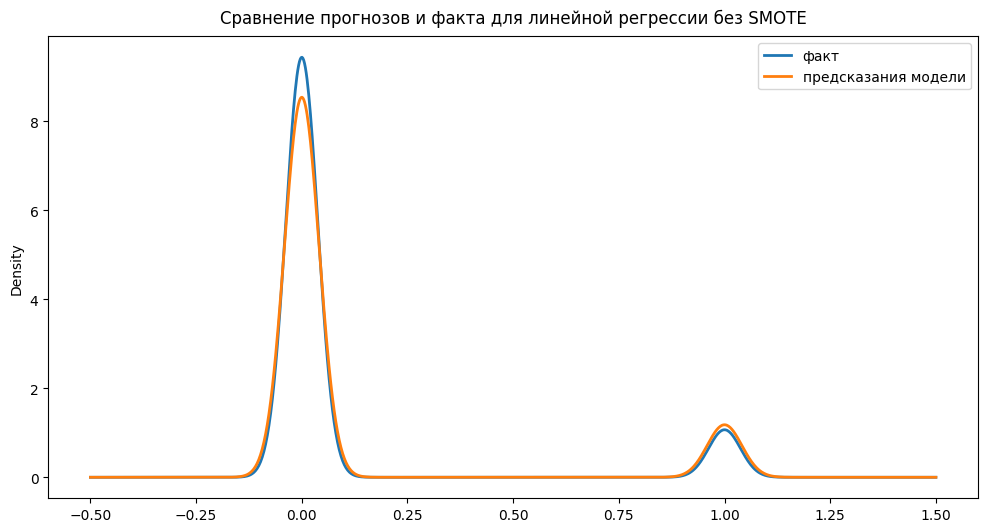

In [45]:
plt.figure(figsize=(12, 6))
y_test.plot(kind='kde', linewidth=2)
pd.Series(lr_predict).plot(kind='kde',linewidth=2)
plt.title('Сравнение прогнозов и факта для линейной регрессии без SMOTE', y=1.01)
plt.legend(['факт','предсказания модели'])
plt.show()

## Выводы

В процессе работы над проектом была проведена подготовка данных:
* из текста удалены лишние символы
* проведена лемматизация данных
* данные разделены на выборки с использованием стратификации для равномерного распределения классов
* тексты преобразованны с использованием TF-IDF
* произведена балансировка классов SMOTE

Былиобучены модели:
* CatBoostClassifier
* LGBMClassifier	
* LogisticRegression	

Обучение проводилось паралельно на данных стратификации и сбалансированных SMOTE.
В процессе анализа результатов обучения модели сбалансированных классов SMOTE показали лучшие результаты по сравнению с теми, что обучались просто на стратификационных данных. 

Как, в последствии выяснилось модели сбалансированных класов переобучились и показали плохие результаты на тестовых данных. <br>

Цели обучения удалось достичь на модели линейной регрессии **F1: 0.7594** при времени обучения в 13 секунд. 

Эту модель можно рекомендовать для дальнейшего использования в бизнесе.